In [1]:
%matplotlib inline

In [2]:
import pulp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import lp_solve as lp

In [3]:
HMAX = 3000 #Maximum harvested energy

DMIN = 1 #20% duty cycle = 100 mWhr
DMAX = 5 #100% duty cycle = 500 mWhr
DSCALE = 100 #scale to convert action value to actual power consumption
NMAX = DMAX * DSCALE #max energy consumption

BMIN = 1000.0
BMAX = 40000.0
BOPT = 0.6 * BMAX
BINIT = 0.6 * BMAX

In [4]:
year = 2012
filename = str(year)+'.csv'

In [5]:
#skiprows=4 to remove unnecessary title texts
#usecols=4 to read only the Global Solar Radiation (GSR) values
solar_radiation = pd.read_csv(filename, skiprows=4, encoding='shift_jisx0213', usecols=[4])

In [6]:
#convert dataframe to numpy array
solar_radiation = solar_radiation.values
solar_energy = np.array([i *0.0165*1000000*0.15*1000/(60*60) for i in solar_radiation])

In [7]:
#reshape solar_energy into 365x24 array
henergy = solar_energy.reshape(-1,24)
henergy[np.isnan(henergy)] = 0 #convert missing data in CSV files to zero

In [8]:
#solve the optimization problem for each day assuming each day starts with BINIT battery
a_val = np.array([lp.solve(henergy[i]) for i in range(0, len(henergy))])
# a_val = np.zeros(henergy.shape)
# for i in range(0, len(henergy)):
#     print(i)
#     a_val[i] = np.array([lp.solve(henergy[i])])

In [9]:
n_val = a_val*DSCALE #convert action -> node energy consumption

In [10]:
#Initialize array to hold battery values
batt_val = np.zeros(a_val.shape)

In [11]:
#Create battery profile
for day in range(0, a_val.shape[0]):
    previous_batt = BINIT
    for hour in range(0, a_val.shape[-1]):
        batt_val[day][hour] = previous_batt + henergy[day][hour] - n_val[day][hour]
        previous_batt = batt_val[day][hour]

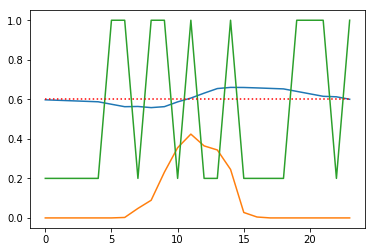

In [13]:
#plot the battery, henergy and node energy consumption profile for day = (0,364)
day = 10
plt.plot(batt_val[day]/BMAX)
plt.plot(henergy[day]/HMAX)
plt.plot(n_val[day]/NMAX)
plt.plot([BOPT/BMAX]*a_val.shape[-1],'r:')
plt.show()
